In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import cv2
from PIL import Image

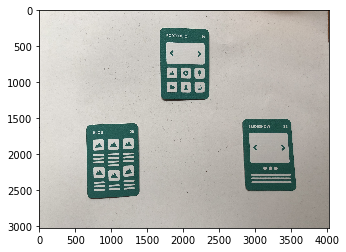

In [90]:
#Load images
img = mpimg.imread('IMG_3417.jpg')
plt.imshow(img)


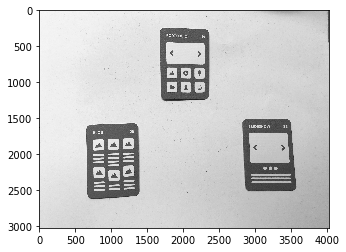

In [91]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='Greys_r')

In [92]:
img_gray_inv = 255 - gray

In [93]:
img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21),
                            sigmaX=0, sigmaY=0)

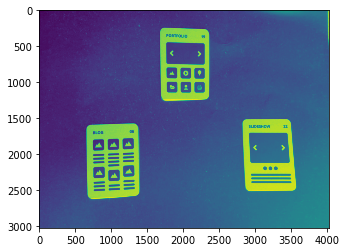

In [94]:
plt.imshow(img_blur)

In [123]:
sketch_gray, sketch_color = cv2.pencilSketch(img_blur, sigma_s=80, sigma_r=0.04, shade_factor=0.07)

error: OpenCV(3.4.1) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:11180: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [95]:
def dodgeV2(image, mask):
  return cv2.divide(image, 255-mask, scale=256)

In [96]:
def burnV2(image, mask):
  return 255 - cv2.divide(255-image, 255-mask, scale=256)

In [97]:
img_blend = dodgeV2(gray, img_blur)
cv2.imshow("pencil sketch", img_blend)

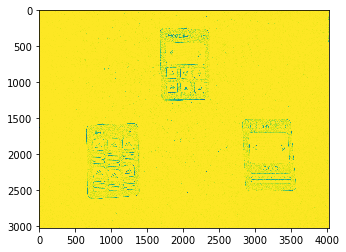

In [98]:
plt.imshow(img_blend)
plt.show()

In [126]:
sketch_gray, sketch_color = cv2.pencilSketch(img, sigma_s=80, sigma_r=0.04, shade_factor=0.07)

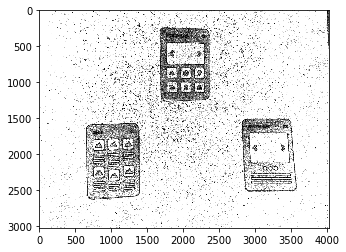

In [127]:
plt.imshow(sketch_gray,cmap = "gray")
plt.show()

In [172]:
img_blur = cv2.GaussianBlur(sketch_gray, ksize=(27, 27),
                            sigmaX=0, sigmaY=0)


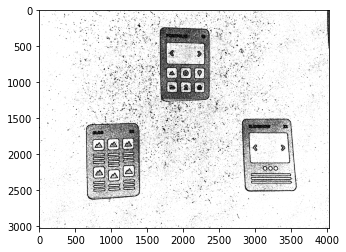

In [213]:
plt.imshow(img_blur,cmap = "gray")
plt.show()

In [221]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 6
min_line_length = 40
max_line_gap = 120
# line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(img_blur, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

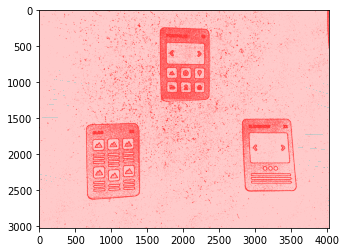

In [222]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((img_blur, img_blur, img_blur)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

In [194]:
# load color image
im = cv2.imread('IMG_3417.jpg')

# smooth the image with alternative closing and opening
# with an enlarging kernel
morph = im.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# split the gradient image into channels
image_channels = np.split(np.asarray(morph), 3, axis=2)

channel_height, channel_width, _ = image_channels[0].shape

# apply Otsu threshold to each channel
for i in range(0, 3):
    _, image_channels[i] = cv2.threshold(image_channels[i], 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
    image_channels[i] = np.reshape(image_channels[i], newshape=(channel_height, channel_width, 1))

# merge the channels
image_channels = np.concatenate((image_channels[0], image_channels[1], image_channels[2]), axis=2)

# save the denoised image
cv2.imwrite('output.jpg', image_channels)

True

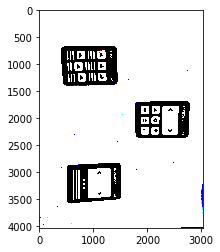

In [195]:
plt.imshow(image_channels)

In [210]:
image_channels.shape


(4032, 3024, 3)

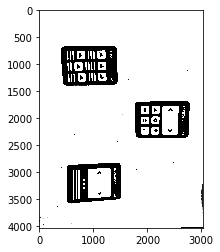

In [227]:
gray = cv2.cvtColor(image_channels, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap= "gray")
plt.show()


In [262]:
np.shape(contours)

(304,)

In [229]:
x = 3
y = 8
iterations = 9

In [230]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (x, y))  

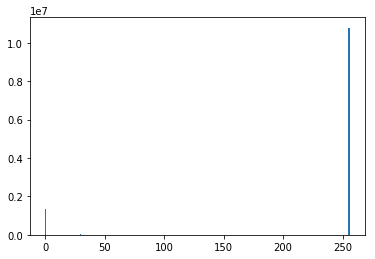

In [261]:
plt.hist(gray.ravel(),256,[0,256]); plt.show()

In [259]:
# Define our parameters for Canny and apply
low_threshold = 2
high_threshold = 70
edges = cv2.Canny(gray, low_threshold, high_threshold)

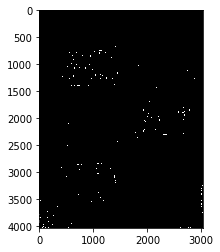

In [260]:
plt.imshow(edges, cmap='gray')

In [240]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 6
min_line_length = 30
max_line_gap = 200
# line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(gray, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [237]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)


error: OpenCV(3.4.1) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:659: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op


In [197]:
for contour in contours:
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

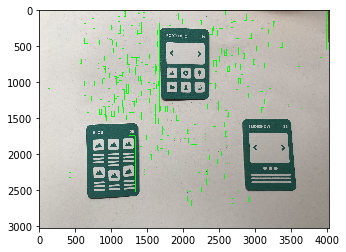

In [198]:
plt.imshow(image)
plt.show()

In [182]:
# Define our parameters for Canny and apply
low_threshold = 100
high_threshold = 0
masked_edges = cv2.Canny(img_blur, low_threshold, high_threshold)


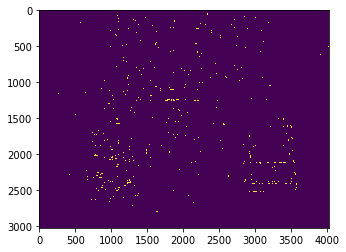

In [183]:
plt.imshow(masked_edges)

In [141]:
img_blur.shape

(3024, 4032)

In [147]:
x = 3
y = 8
iterations = 9

In [148]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (x, y))  

In [149]:
dilated = cv2.dilate(masked_edges, kernel, iterations=iterations) # dilate , more the iteration more the dilation
img, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

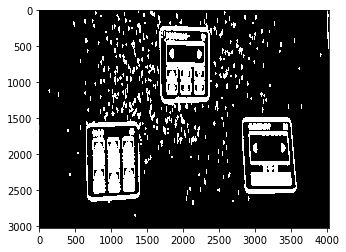

In [150]:
plt.imshow(dilated, cmap='gray')
plt.show()

In [151]:
for contour in contours:
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

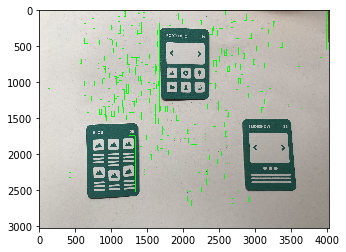

In [152]:
plt.imshow(image)
plt.show()

In [54]:
# Note: always make a copy rather than simply using "="
color_select = np.copy(img)
img = (img/255) 

In [27]:
# Get stats of image
def getImageStat(image):
    return np.shape(image)

In [61]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 1
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 80
high_threshold = 80
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

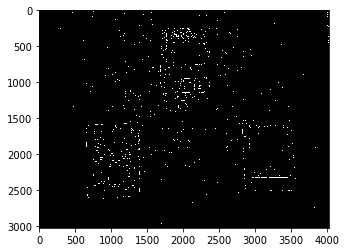

In [62]:
# Display the image                 
plt.imshow(edges,cmap="gray")
plt.show()

In [14]:
np.shape(edges)

(3024, 4032)

In [110]:
np.array(edges)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

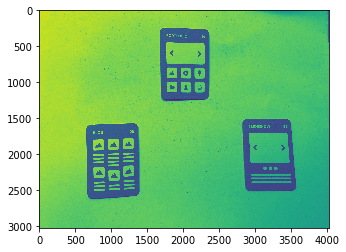

In [45]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in and grayscale the image
image = mpimg.imread('IMG_3417.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)


plt.imshow(gray)

In [46]:

# Define a kernel size and apply Gaussian smoothing
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 30
high_threshold = 160
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)


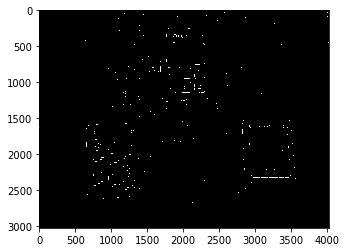

In [47]:
plt.imshow(masked_edges, cmap="gray")

In [133]:
x = 3
y = 8
iterations = 9


In [134]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (x, y))  

In [135]:
dilated = cv2.dilate(masked_edges, kernel, iterations=iterations) # dilate , more the iteration more the dilation
img, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

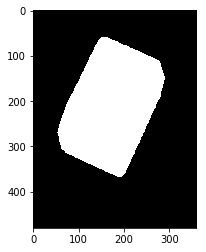

In [136]:
plt.imshow(dilated, cmap='gray')
plt.show()

In [137]:
np.shape(contours)

(1, 764, 1, 2)

In [142]:
for contour in contours:
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

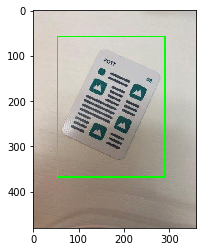

In [143]:
plt.imshow(image)
plt.show()

In [138]:
contours[0]

array([[[158,  58]],

       [[157,  59]],

       [[156,  59]],

       ...,

       [[161,  59]],

       [[160,  59]],

       [[159,  59]]], dtype=int32)

In [95]:

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 6
min_line_length = 85
max_line_gap = 6
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)


In [94]:
print (lines)

[[[236 246 279 152]]

 [[ 84 215 146  89]]

 [[ 70 277 184 330]]

 [[ 75 232 143  93]]

 [[164  87 249 125]]

 [[ 63 271 165 318]]

 [[158  85 274 137]]]


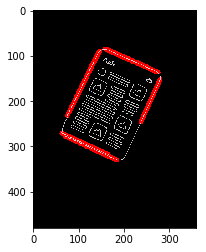

In [96]:

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)


In [68]:
# The line form: y = ax+b
def getLineFunction(x1, y1, x2, y2):
    a = (y1-y2)/(x1-x2)
    b = y1-a*x1
    return a, b

In [69]:
# Calculate x when input is y
def getXCoordination(y, a, b):
    if (a == 0):
        a = 1e-06
    return (y - b)/a

In [ ]:
# Calculate y when input is x
def getYCoordination(x, a, b):
    return a*x+b

In [74]:
def getLaneCoord(side, lines, img_height, img_width):
    result = []
    # If exist lines on side
    if (checkExistEdges(side, lines, img_width) == True):
        # Get random points from 'lines' list - left side
        x1, x2, y1, y2 = getPointsCoord(side, lines)

        # Get parameter of lane line
        a, b = getLineFunction(x1, y1, x2, y2)

        # Calculate x- and y-Coordination of lane line
        y_1 = img_height
        x_1 = getXCoordination(y_1, a, b)

        y_2 = 0.65*img_height
        x_2 = getXCoordination(y_2, a, b)
        
        result.append(x_1)
        result.append(x_2)
        result.append(y_1)
        result.append(y_2)
        
    return result

In [76]:

left_side  = getLaneCoord('left', lines, img_height, img_width)
right_side = getLaneCoord('right', lines, img_height, img_width)

NameError: name 'img_height' is not defined

In [78]:

def restrictedArea(img_height, img_width):
    # Define the nodes of the area
    left_bottom = [img_width/20, 0.95*img_height] # 5% of image's height margin bottom
    right_bottom = [0.95*img_width, 0.95*img_height]
    apex1 = [0.4*img_width, 0.6*img_height] # 40% of image's height margin bottom
    apex2 = [0.6*img_width, 0.6*img_height]
    
    return left_bottom, right_bottom, apex1, apex2

In [79]:

left_bottom , right_bottom, apex1, apex2 = restrictedArea(img_height, img_width)

NameError: name 'img_height' is not defined

In [80]:
# Get stats of image
def getImageStat(image):
    return np.shape(image)

In [81]:
img_height, img_width, img_depth = getImageStat(image)

In [86]:

print('This image is: ',type(image), 
    'with dimensions:', image.shape)
print('height:', img_height)
print('width:', img_width)
print('depth:', img_depth)

This image is:  <class 'numpy.ndarray'> with dimensions: (480, 360, 3)
height: 480
width: 360
depth: 3


In [87]:
lines.shape

(4, 1, 4)

In [88]:
im = Image.open('IMG_2622.')   
w, h = im.size
im.crop((lines[0], 30, w-60, h-30))

FileNotFoundError: [Errno 2] No such file or directory: 'IMG_2622.'

In [18]:

im = cv2.imread('IMG_2592.jpg')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(3,3),1000)
flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)

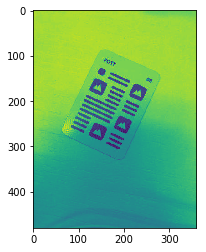

In [19]:
plt.imshow(gray)
plt.show()

In [20]:
np.shape(gray)

(480, 360)

In [89]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:1] 

ValueError: too many values to unpack (expected 2)